<a href="https://colab.research.google.com/github/Evianitary18/Data-Analyst-Project/blob/main/Analisis_Sentimen_Makan_Gratis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPARATION

In [4]:
# Import Library

!pip install Sastrawi scikit-learn matplotlib seaborn

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [5]:
 # code untuk menghilangkan warning message saat menjalankan code di bawah
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load data kita ke sebuah dataframe bernamaa
data = pd.read_csv('makangratis_valid.csv')
data.head()

,full_text,label
0,@iweng01 @akunbarublek @ignasbowo Tpi tujuan a...,N
1,BI Dukung Program Makan Siang Gratis Asalkan T...,P
2,@RizkiDimasDwij @masgah_ @Ipaahu La iya dana b...,N
3,@OposisiCerdas Ya di gaji sama makan siang gra...,N
4,"@RhendyW @marufins Sama kek stunting, solusiny...",N


# EDA

In [8]:
data.shape

(656, 2)

In [9]:
data

,full_text,label
0,@iweng01 @akunbarublek @ignasbowo Tpi tujuan a...,N
1,BI Dukung Program Makan Siang Gratis Asalkan T...,P
2,@RizkiDimasDwij @masgah_ @Ipaahu La iya dana b...,N
3,@OposisiCerdas Ya di gaji sama makan siang gra...,N
4,"@RhendyW @marufins Sama kek stunting, solusiny...",N
...,...,...
651,@toe_giman @alham1970 Bohong mulu... 10.tahun ...,N
652,@Y_D_Y_P Makan Siang Gratis di negara Jepang ...,P
653,@undipmenfess nikmatin aja tuh makan siang gra...,N
654,@Mdy_Asmara1701 @Punggawatikkor1 Yang penting ...,N


In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  656 non-null    object
 1   label      656 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


# DATA CLEANING

**1. Missing Value**

In [11]:
#melakukan cek missing value
missing_values = data.isnull().sum()
if missing_values.sum() == 0:
    print('Tidak ada missing value')
else:
    print('Terdapat missing value', missing_values)


Tidak ada missing value


**2. Duplikat**

In [12]:
data.duplicated().sum()

0

**3. Typo**

In [13]:
# label
data.label.unique()

array(['N', 'P'], dtype=object)

In [14]:
# full_text
data.full_text.unique()

array(['@iweng01 @akunbarublek @ignasbowo Tpi tujuan awal dari makan siang gratis ini kan untuk perbaikan gizi dan pencegahan stunting? Pencegahan stunting ini jls g efektif krn prio nya di anak sekolah, lalu gmn kl misal anak itu ga suka lauknya/pnya alergi? Anak kecil kbnykn picky eater jd berkemungkinan besar g dimkn',
       'BI Dukung Program Makan Siang Gratis Asalkan Tak Ganggu Stabilitas Keuangan https://t.co/OtJJgdUUOX',
       '@RizkiDimasDwij @masgah_ @Ipaahu La iya dana bos aja dikorup, apalagi ada proyek makan siang gratis Sama aja kalau sdm sekolahnya sudah korup ya selamanya korup, korupnya tetep sama cuma beda proyek, kalau dulu korupnya proyek beli buku kalau skrng proyek beli susu',
       '@OposisiCerdas Ya di gaji sama makan siang gratis lah',
       '@RhendyW @marufins Sama kek stunting, solusinya makan siang gratis tanpa menyelesaikan akar permasalahannya (ditambah alurnya yang ga jelas)',
       '@MrsTitins @ZackXChristy @akunbarublek @ignasbowo Gak baca programn

**4. Membersihkan teks**

In [16]:
# Bersihkan teks
def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'@\w+', '', text)  # Hapus mentions
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    return text

data['cleaned_text'] = data['full_text'].apply(clean_text)
data.head()

,full_text,label,cleaned_text
0,@iweng01 @akunbarublek @ignasbowo Tpi tujuan a...,N,tpi tujuan awal dari makan siang gratis ini...
1,BI Dukung Program Makan Siang Gratis Asalkan T...,P,bi dukung program makan siang gratis asalkan t...
2,@RizkiDimasDwij @masgah_ @Ipaahu La iya dana b...,N,la iya dana bos aja dikorup apalagi ada pro...
3,@OposisiCerdas Ya di gaji sama makan siang gra...,N,ya di gaji sama makan siang gratis lah
4,"@RhendyW @marufins Sama kek stunting, solusiny...",N,sama kek stunting solusinya makan siang grat...


**5. Stopwords Removal & Stemming**

- Menghapus kata-kata umum (stopwords) yang tidak memiliki makna penting.
- Stemming untuk mengembalikan kata ke bentuk dasar.

In [17]:
# Load stopwords dan buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar stopwords
stopwords = set([
    'dan', 'yang', 'di', 'ke', 'dari', 'untuk', 'pada', 'ini', 'itu', 'dengan', 'seperti',
    'adalah', 'sudah', 'akan', 'atau', 'juga'
])

# Fungsi untuk stemming dan menghapus stopwords
def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

data['processed_text'] = data['cleaned_text'].apply(preprocess_text)
data.head()

,full_text,label,cleaned_text,processed_text
0,@iweng01 @akunbarublek @ignasbowo Tpi tujuan a...,N,tpi tujuan awal dari makan siang gratis ini...,tpi tuju awal makan siang gratis kan baik gizi...
1,BI Dukung Program Makan Siang Gratis Asalkan T...,P,bi dukung program makan siang gratis asalkan t...,bi dukung program makan siang gratis asal tak ...
2,@RizkiDimasDwij @masgah_ @Ipaahu La iya dana b...,N,la iya dana bos aja dikorup apalagi ada pro...,la iya dana bos aja korup apalagi ada proyek m...
3,@OposisiCerdas Ya di gaji sama makan siang gra...,N,ya di gaji sama makan siang gratis lah,ya gaji sama makan siang gratis lah
4,"@RhendyW @marufins Sama kek stunting, solusiny...",N,sama kek stunting solusinya makan siang grat...,sama kek stunting solusi makan siang gratis ta...


**6. Tokenizing dan TF-IDF**

In [18]:
# Konversi teks ke representasi numerik dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Ambil hingga 5000 fitur
X = tfidf.fit_transform(data['processed_text']).toarray()

# Label (Positif = 1, Negatif = 0)
y = data['label'].map({'P': 1, 'N': 0})

**7. Split Data & Latih Model**

In [20]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test),

**8. Evaluasi**

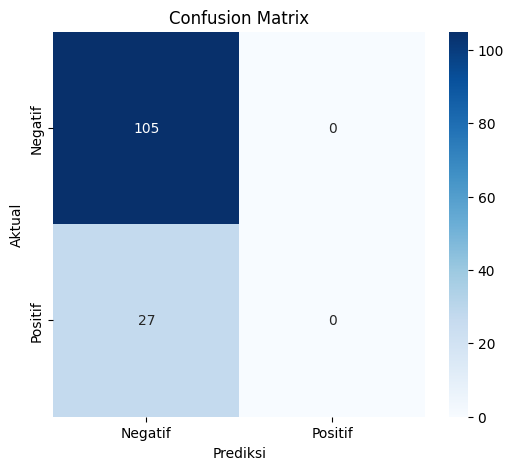

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       105
           1       0.00      0.00      0.00        27

    accuracy                           0.80       132
   macro avg       0.40      0.50      0.44       132
weighted avg       0.63      0.80      0.70       132

Akurasi Model: 0.80


In [22]:
# Pastikan model menghasilkan prediksi untuk seluruh data uji
y_pred = model.predict(X_test)  # Prediksi semua data uji

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Laporan Klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

In [23]:
print(len(y_test), len(y_pred))

132 132


Diketahui hasil prediksi menggunakan confussion metrix ialah:

1. Jumlah sampel *True Negatives* (TN) atau sampel dengan label Negatif yang diprediksi dengan benar sebagai Negatif sebanyak 105.
2. Jumlah sampel *False Positives* (FP) atau sampel dengan label Negatif, tetapi diprediksi sebagai Positif sebanyak 0.
3. Jumlah sampel *False Negatives* (FN) atau sampel dengan label Positif, tetapi diprediksi sebagai Negatif ialah 27
4. Jumlah sampel *True Positives* (TP)  atau sampel dengan label Positif yang diprediksi dengan benar sebagai Positif sebanyak 0


# INTEPRETASI

- Model ini hanya memprediksi Negatif untuk semua sampel (kecenderungan model bias ke salah satu kelas).
- Tidak ada satupun prediksi untuk kelas Positif yang benar (True Positive = 0)

- Accuracy (Akurasi): 0.80 (80%)
Model tampaknya memiliki akurasi tinggi, tetapi ini menipu karena model hanya memprediksi kelas mayoritas.
- Precision dan Recall untuk Positif: 0.00
Model tidak mampu mengenali kelas Positif dengan baik.

- Bisa dikatakan model sangat bias terhadap kelas mayoritas (Negatif).
- Model gagal mengidentifikasi kelas minoritas (Positif).

# RANDOM FOREST

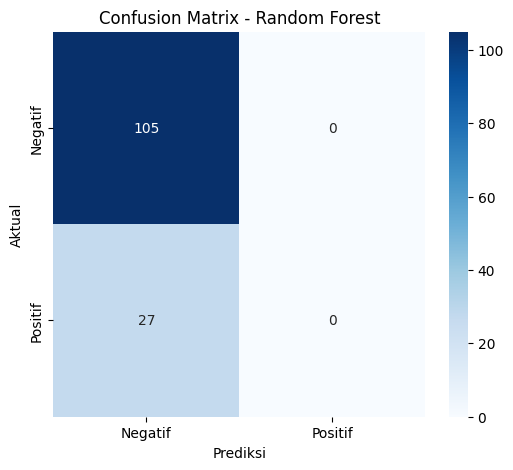

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       105
           1       0.00      0.00      0.00        27

    accuracy                           0.80       132
   macro avg       0.40      0.50      0.44       132
weighted avg       0.63      0.80      0.70       132

Akurasi Model Random Forest: 0.80


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model menggunakan data latih
rf_model.fit(X_train, y_train)

# Prediksi data uji
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Laporan Klasifikasi
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))

# Akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Model Random Forest: {accuracy_rf:.2f}")


Ternyata ketika diteliti, meskipun dengan algoritma random forest, hasilnya tetap sama. Sepertinya kesamaan dan ketidakakuratan hasil dikarena sample yang tidak balance.

**Resampling data dengan SMOTE**

Distribusi Data Setelah SMOTE:
label
0    428
1    428
Name: count, dtype: int64


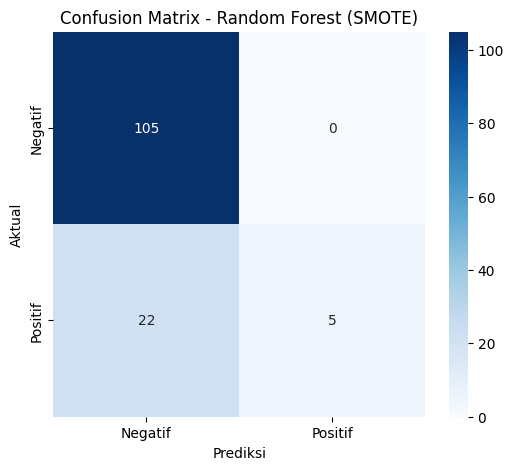

Classification Report - Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       105
           1       1.00      0.19      0.31        27

    accuracy                           0.83       132
   macro avg       0.91      0.59      0.61       132
weighted avg       0.86      0.83      0.78       132

Akurasi Model Random Forest (SMOTE): 0.83


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Resampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Tampilkan distribusi data setelah SMOTE
print("Distribusi Data Setelah SMOTE:")
print(y_resampled.value_counts())

# Inisialisasi model Random Forest
rf_model_smote = RandomForestClassifier(random_state=42)

# Latih model dengan data yang telah diresampling
rf_model_smote.fit(X_resampled, y_resampled)

# Prediksi data uji
y_pred_smote = rf_model_smote.predict(X_test)

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest (SMOTE)')
plt.show()

# Laporan Klasifikasi
print("Classification Report - Random Forest (SMOTE):\n", classification_report(y_test, y_pred_smote))

# Akurasi
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Akurasi Model Random Forest (SMOTE): {accuracy_smote:.2f}")


Berikut analisis hasil dari confusion matrix:

- **Distribusi Data Setelah SMOTE:**

1. Kelas Negatif (0): 428 sampel.
2. Kelas Positif (1): 428 sampel.
SMOTE berhasil menyeimbangkan jumlah sampel antara kelas minoritas dan mayoritas.

- **Confusion Matrix:**

1. True Negatives (TN): 105 → Model memprediksi Negatif dan benar-benar Negatif.
2. False Negatives (FN): 22 → Model memprediksi Negatif, tetapi sebenarnya Positif.
3. True Positives (TP): 5 → Model memprediksi Positif dan benar-benar Positif.
4. False Positives (FP): 0 → Model tidak salah memprediksi Negatif sebagai Positif.

- **Observasi:**

Model memiliki kinerja yang baik untuk memprediksi kelas Negatif, karena semua Negatif terprediksi dengan benar (Precision tinggi untuk Negatif).
Recall untuk kelas Positif rendah, karena dari 27 sampel Positif, hanya 5 yang terprediksi benar sebagai Positif, sementara 22 salah diprediksi sebagai Negatif.